In [5]:
import pandas as pd
import numpy as np


Reading the data:

In [6]:
df = pd.read_csv("E:\Guvi\Projects\Inventory forecasting\\train 2.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


Exploratory Data Analysis(EDA)

In [7]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

findings: 
We can see that the data is clean of outliers and duplicates. Since, there will be 
1. 1826 days in 5 years period 
2. As per the data we have 10 unique stores and 50 unique products. 
3. We can not tell whether all the values in sales are right/wrong.

In [8]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Finding: We can see that all the columns are in 'int64' datatype other than date which is in 'object' datatype.

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

Changed date column to 'datetime' format for better interpretation and Timeseries forecasting. 

In [10]:
print(df)

             date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]


Grouping by date, store, item to get overall sales of a particular item on a particular date across 10 stores.

In [11]:
df2 = df.groupby(['date','item'], as_index = False).sales.sum()
df2

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


Rearranging columns with item as first and date as second.

In [12]:
df3 = df2.groupby(['item','date'],as_index = False).sales.sum()

In [13]:
df3

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


Splitting the dataframe into 50 dataframes to get item specific datasets to analyze and predict the particular item.

In [14]:
item_seperated_dataframes = df3.item.unique()

In [15]:
item_seperated_dataframes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [16]:
DataframeDict = {}
DataframeDict = {x:item_seperated_dataframes for x in item_seperated_dataframes}

In [17]:
DataframeDict


{1: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 2: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 3: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 4: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 5: 

In [18]:
for key in DataframeDict.keys():
    DataframeDict[key] = df3[:][df3.item == key]

In [19]:
DataframeDict[2]

,item,date,sales
1826,2,2013-01-01,327
1827,2,2013-01-02,279
1828,2,2013-01-03,304
1829,2,2013-01-04,359
1830,2,2013-01-05,377
...,...,...,...
3647,2,2017-12-27,500
3648,2,2017-12-28,495
3649,2,2017-12-29,515
3650,2,2017-12-30,538


In [20]:
DataframeDict[1]['demand'] = DataframeDict[1].sales.rolling(window = 90).sum()


In [21]:
DataframeDict[1]

,item,date,sales,demand
0,1,2013-01-01,133,NaN
1,1,2013-01-02,99,NaN
2,1,2013-01-03,127,NaN
3,1,2013-01-04,145,NaN
4,1,2013-01-05,149,NaN
...,...,...,...,...
1821,1,2017-12-27,154,20796.0
1822,1,2017-12-28,178,20704.0
1823,1,2017-12-29,207,20642.0
1824,1,2017-12-30,236,20578.0


In [22]:
demand_1 = DataframeDict[1]['demand'].dropna().reset_index(drop= True)

In [23]:
demand_1

0       12847.0
1       12848.0
2       12936.0
3       13019.0
4       13103.0
         ...   
1732    20796.0
1733    20704.0
1734    20642.0
1735    20578.0
1736    20610.0
Name: demand, Length: 1737, dtype: float64

In [24]:
DataframeDict[1]

,item,date,sales,demand
0,1,2013-01-01,133,NaN
1,1,2013-01-02,99,NaN
2,1,2013-01-03,127,NaN
3,1,2013-01-04,145,NaN
4,1,2013-01-05,149,NaN
...,...,...,...,...
1821,1,2017-12-27,154,20796.0
1822,1,2017-12-28,178,20704.0
1823,1,2017-12-29,207,20642.0
1824,1,2017-12-30,236,20578.0


In [25]:
DataframeDict[1].drop(axis = 1, columns = ['demand'], inplace = True)

In [26]:
DataframeDict[1]['demand_1'] = pd.DataFrame(demand_1)

In [27]:
DataframeDict[1].isnull().value_counts()

item   date   sales  demand_1
False  False  False  False       1737
                     True          89
dtype: int64

In [28]:
DataframeDict[1].dropna(inplace = True)

In [29]:
DataframeDict[1]

,item,date,sales,demand_1
0,1,2013-01-01,133,12847.0
1,1,2013-01-02,99,12848.0
2,1,2013-01-03,127,12936.0
3,1,2013-01-04,145,13019.0
4,1,2013-01-05,149,13103.0
...,...,...,...,...
1732,1,2017-09-29,270,20796.0
1733,1,2017-09-30,269,20704.0
1734,1,2017-10-01,300,20642.0
1735,1,2017-10-02,195,20578.0


In [36]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

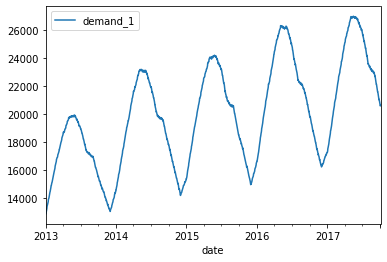

In [37]:
DataframeDict[1].plot(x = 'date',y = 'demand_1')#date vs demand

In [ ]:
def date_features(df):
    # Date Features
    df['date'] = pd.to_datetime(dataset['date'])
    df['year'] = dataset.date.dt.year
    df['month'] = dataset.date.dt.month
    df['day'] = dataset.date.dt.day
    df['dayofyear'] = dataset.date.dt.dayofyear
    df['dayofweek'] = dataset.date.dt.dayofweek
    df['weekofyear'] = dataset.date.dt.weekofyear
    
    # Additionnal Data Features
    df['day^year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    
    # Drop date
    df.drop('date', axis=1, inplace=True)
    
    return df

# Dates Features for Train, Test
train, test = date_features(train), date_features(test)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix

In [39]:
X = DataframeDict[1].drop("demand_1", axis=1)

y = DataframeDict[1].pop("demand_1")

X.head()

,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1371 to 555
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   item    522 non-null    int64         
 1   date    522 non-null    datetime64[ns]
 2   sales   522 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 16.3 KB
